<a href="https://colab.research.google.com/github/kundanjha20/Tensorflow_Training/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Fashion MNIST


In [2]:
#importing required libraries
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [11]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [12]:
#convolution requires data in height x width x color but we have only 2D data so coverting dimension
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [13]:
#Getting number of classes
K= len(set(y_train))
print(K)  #Total 10 classes we have

10


In [0]:
#Build the model using functional API

#Starting Convolution Section
i = Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2, activation='relu')(x)
x=Conv2D(128,(3,3),strides=2, activation='relu')(x)
x=Flatten()(x)

#Starting Neural Network
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)


In [22]:
#Building the model
model=Model(i,x)
# Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Classifier=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5202 - accuracy: 0.8067 - val_loss: 0.3927 - val_accuracy: 0.8477
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3546 - accuracy: 0.8669 - val_loss: 0.3428 - val_accuracy: 0.8689
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3054 - accuracy: 0.8854 - val_loss: 0.3246 - val_accuracy: 0.8817
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2770 - accuracy: 0.8946 - val_loss: 0.3071 - val_accuracy: 0.8898
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2486 - accuracy: 0.9056 - val_loss: 0.3058 - val_accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2316 - accuracy: 0.9127 - val_loss: 0.2973 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2108 - accuracy: 0.9198 - val_loss: 0.2845 - val_ac

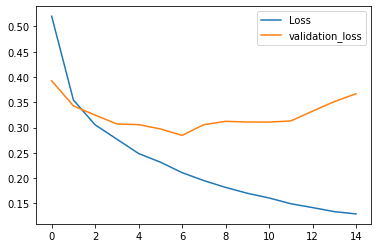

In [23]:
#Plotting loss per iteration
plt.plot(Classifier.history['loss'],label='Loss')
plt.plot(Classifier.history['val_loss'], label='validation_loss')
plt.legend()

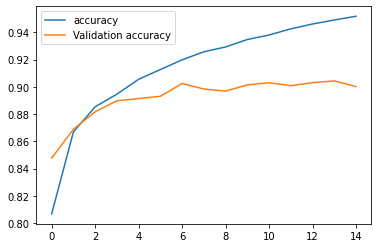

In [24]:
#Plotting Accuracy per iteration
plt.plot(Classifier.history['accuracy'], label='accuracy')
plt.plot(Classifier.history['val_accuracy'], label='Validation accuracy')
plt.legend()

Confusion matrix without normalization
[[887   3  25  26   1   1  47   0  10   0]
 [  3 982   0  11   2   0   1   0   1   0]
 [ 21   0 880  10  38   0  49   0   2   0]
 [ 12   8  18 916  18   0  27   0   1   0]
 [  0   1  86  34 798   0  81   0   0   0]
 [  0   0   0   2   0 973   0  17   0   8]
 [137   4  88  29  74   1 656   0  11   0]
 [  0   0   0   0   0   2   0 988   0  10]
 [  4   0   7   4   2   2   2   4 975   0]
 [  1   0   0   0   0   5   0  46   1 947]]


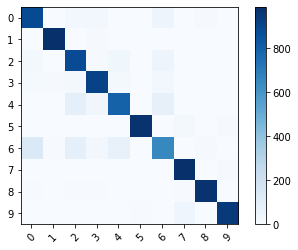

In [38]:
#Plotting the conusion metrics

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,titile='confusion_matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
    print('Normalized Confusion matrix')
  else:
    print('Confusion matrix without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))
  

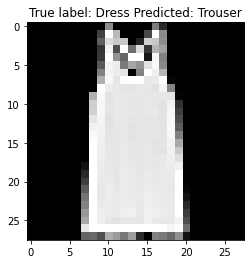

In [43]:
#label mapping
labels='T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneakers Bag Ankle_boat'.split()

  #Showing misclassified Example
Misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(Misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s Predicted: %s' %(labels[y_test[i]], labels[p_test[i]]));

In [0]:
#Saving model
model.save('Fashion_Mnist.h5')


In [42]:
import os
os.listdir()

['.config', 'Fashion_Mnist.h5', 'sample_data']